# Torch Dataset POKE801

All the origin image could be fetch with label `True`.  
There are 801 categories x 51 images in total.  
The filter `filetype:jpg` didn't work well. Besides, the official photo of pokemons are all png images. Therefore, a PIL converter is used.

In [60]:
from __future__ import print_function
from PIL import Image
import os
import os.path
import errno
import numpy as np
import sys
import pickle
import torch
import torchvision
import torch.utils.data as data
# import torchvision.data.ImageFolder
from utils import download_url, check_integrity

In [79]:
root = '/home/dai/GANs'
base_folder = 'img'
width = 4
depth = 5
sub_folder = str(width).zfill(3)
img = str(index).zfill(6) + '.jpg'
dis = os.path.join(root, base_folder,sub_folder, img)
print(dis)

/home/dai/GANs/img/004/000005.jpg


In [145]:
class POKE801(data.Dataset):
    """`POKE801 <https://github.com/TagineerDai/PokeHub>`_ Dataset.
    Args:
        root (string): Root directory of datasets where directory 
            ``PokeHub`` exists.
        transform (callable, optional): A function/transform that 
            takes in a PIL image and returns a transformed version.
            E.g, ``transforms.RandomCrop`` 
    """
    base_folder = 'img'
    fnlist = []
    
    def __init__(self, root, transform=None, download=False):
        if download:
            self.download()
        self.root = root
        #TODO transform, download
        
    def __getitem__(self, index):
        """
        Data from the dataset is always True.
        """
        if self.fnlist:
            img, target = self.fnlist[index], True
        # TODO from filename to ndarray
        # img = cv.read() 
        img = Image.fromarray(img.numpy(), mode='L')
        if self.transform is not None:
            img = self.transform(img)
        return img, target
    
    def __len__(self):
        return self.width * self.depth
    
    def _check_exists(self):
        return os.path.exists(os.path.join(self.root, self.basefolder))
    
    def download(self):
        if self._check_exists():
            return
        return ("Error: Dataset is not found." +
                " You can download it by hand.")

    def build(self, width=801,depth=51):
        """
        Build the file name list `fnlist`.
        """
        if width > 801 or width < 0:
            self.width = 801
        else:
            self.width = width
        if depth > 51 or depth < 0:
            self.depth = 801
        else:
            self.depth = depth
        self.fnlist = []
        
        listdis = os.path.join(self.root, str(self.width).zfill(3)+'cates.txt')
        #print(listdis)
        flist = open(listdis, 'w')
        for pokedex in range(1, width+1):
            sub_folder = str(pokedex).zfill(3)
            folder_dis = os.path.join(self.root, base_folder, sub_folder)
            #print(folder_dis)
            f = os.listdir(folder_dis)
            for afile in f[:depth]:
                dis = os.path.join(self.root, base_folder, sub_folder, afile)
                if afile[-4:] == '.png':
                    img = Image.open(dis)
                    os.remove(dis)
                    dis = dis[:-4]+'.jpg'
                    img.save(dis, format = 'jpeg')
                    print(dis)
                    
                #print(dis)
                flist.write(dis+'\n')
                self.fnlist.append(dis)
        return self.fnlist


In [164]:
train = POKE801(root)
files = train.build(801,51)
print(files[6])

/home/dai/GANs/img/001/000030.jpg


In [168]:
import cv2 
from matplotlib import pyplot as plt

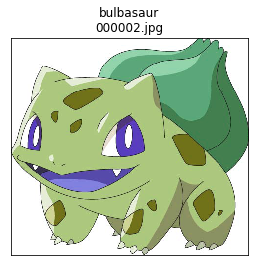

('bulbasaur\n', '000002.jpg')

In [199]:
def plot_image(path):
    cateid = int(path.split('/')[-2]) - 1
    namelist = open("pokelist.txt",'r')
    record = namelist.readlines()[cateid]
    pokename = record.split(' ')[1]
    # Convert dir to ndarray
    # 128*128*3 = 49152
    img = cv2.imread(path,1)
    plt.imshow(img)
    plt.title(pokename + path.split('/')[-1])
    plt.xticks([]), plt.yticks([])
    plt.show()
    return pokename, path.split('/')[-1]
    #return torch.ByteTensor(images).view(-1, 28, 28)

path = '/home/dai/GANs/img/001/000002.jpg'
plot_image(path)

In [219]:
import scipy.misc as misc
path = '/home/dai/GANs/img/001/000002.jpg'

In [227]:
def read_image_file(path):
    img = misc.imread(path)
    img = misc.imresize(img, [128, 128], interp='nearest')
    img = np.array(img)
    img = torch.from_numpy(img)
    return img # torch.ByteTensor

a = read_image_file(path)
print(type(a))
print(a.size())

<class 'torch.ByteTensor'>
torch.Size([128, 128, 3])


### Reference 
1. [Data preprocessing](http://blog.csdn.net/qq_16949707/article/details/56306720)
2. [Pytorch source code mnist.py](https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py)